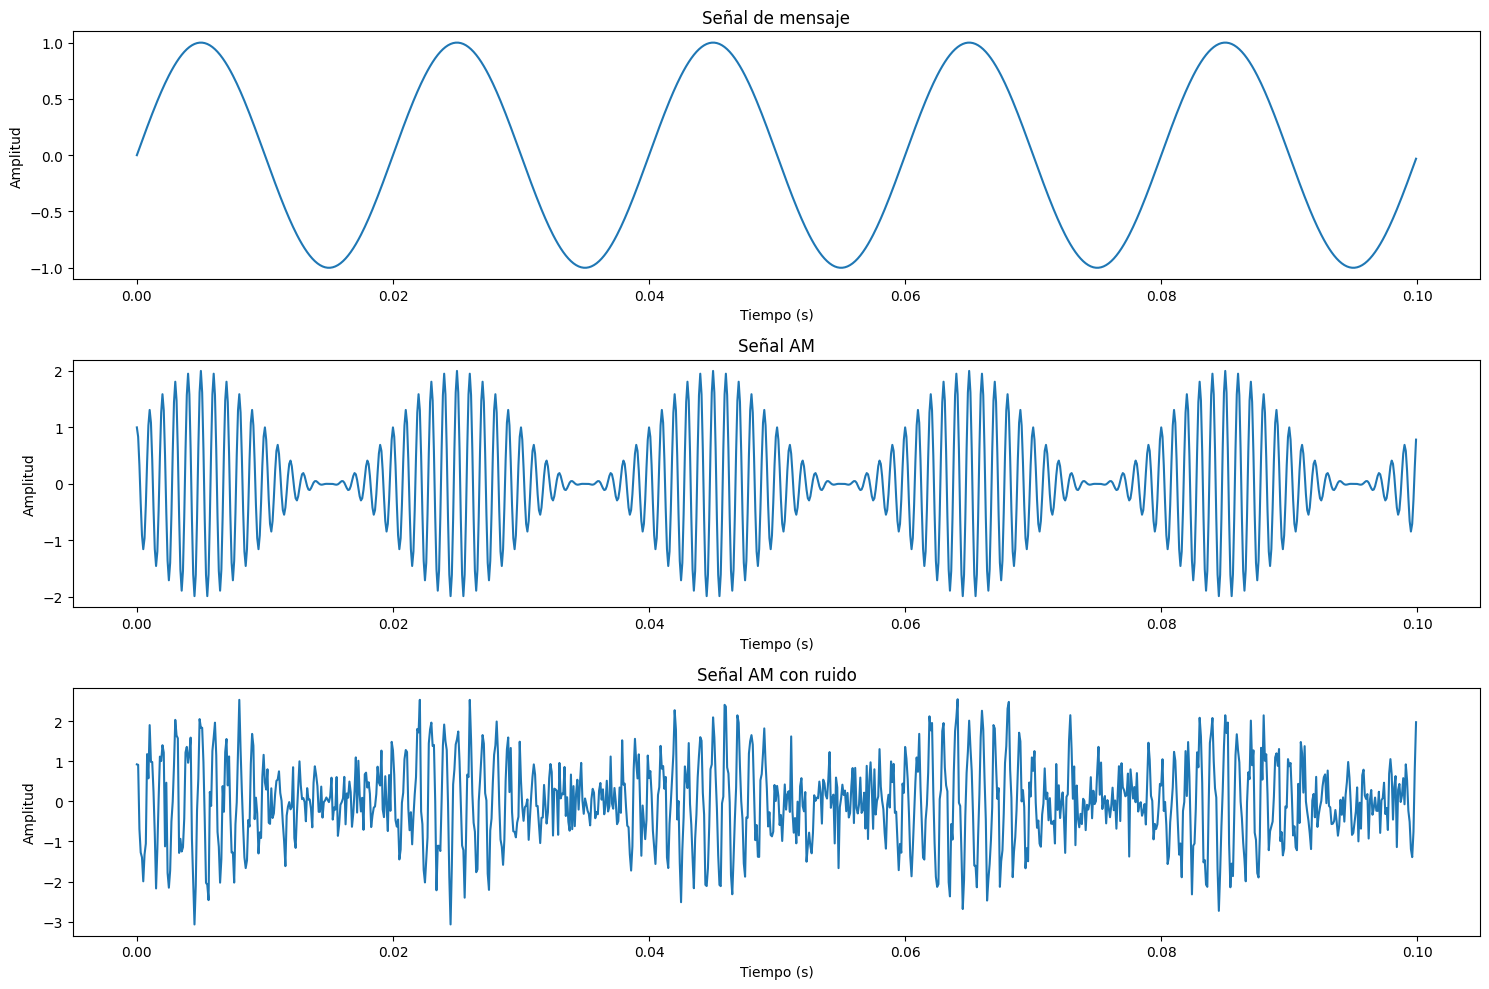

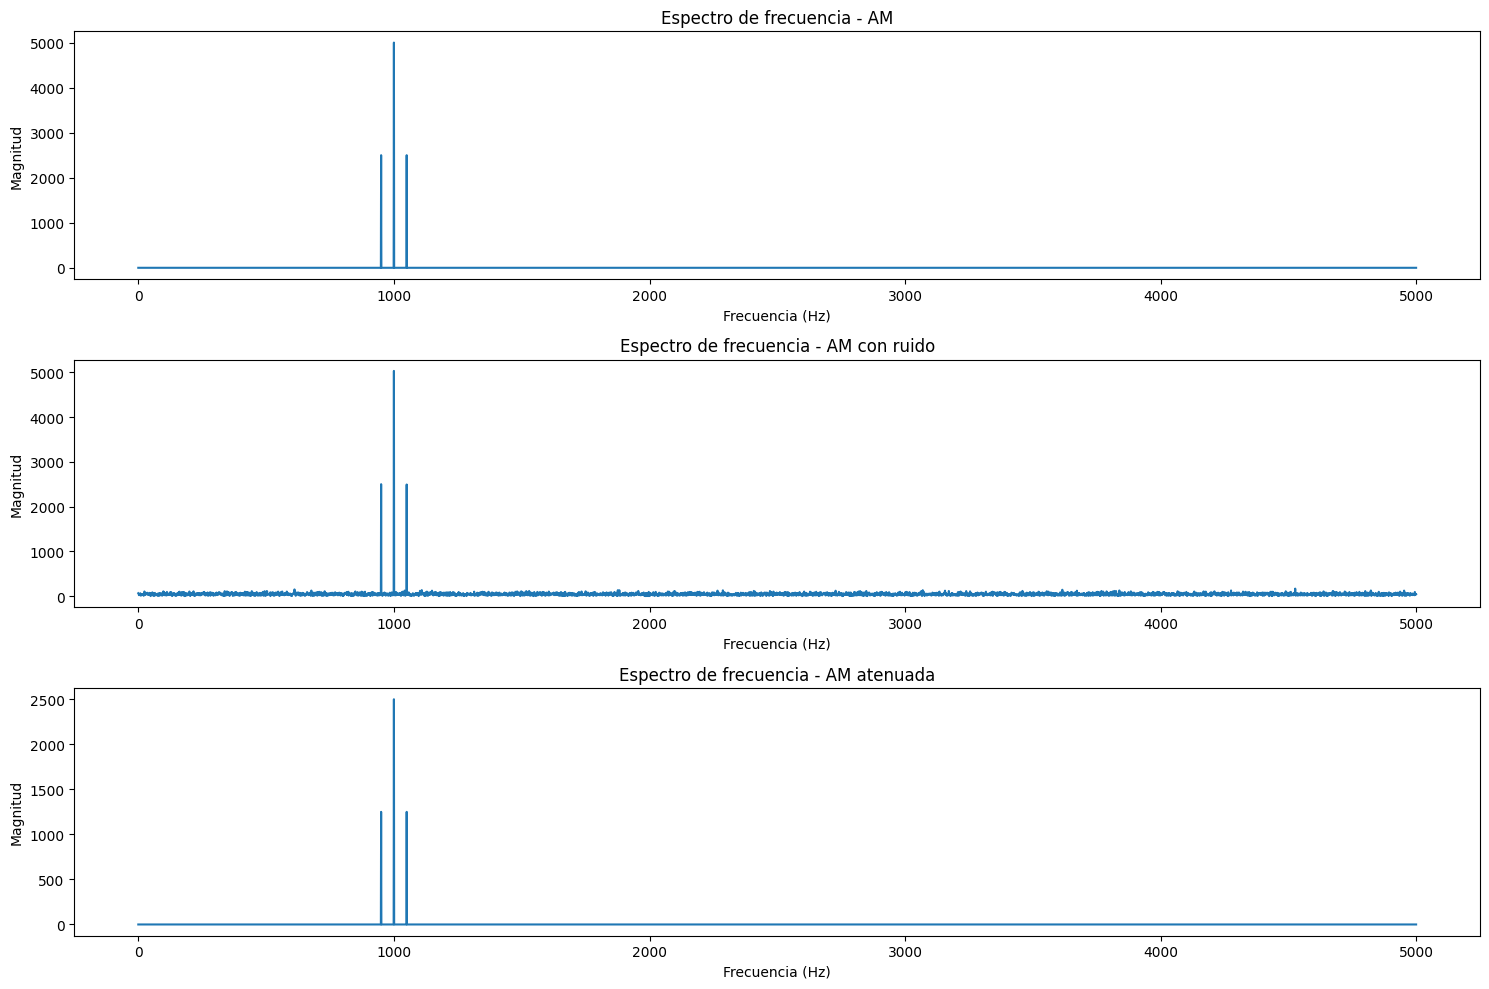

In [1]:
# Saúl Emmanuel De León Estrada
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter

# Parámetros básicos
fs = 10000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de señal

# Señal del mensaje (baja frecuencia)
fm = 50  # Frecuencia del mensaje
Am = 1   # Amplitud del mensaje
mensaje = Am * np.sin(2 * np.pi * fm * t)

# Portadora (alta frecuencia)
fc = 1000  # Frecuencia de la portadora
Ac = 1     # Amplitud de la portadora
portadora = Ac * np.cos(2 * np.pi * fc * t)

# Modulación AM (sin índice de modulación explícito)
senal_am = (1 + mensaje) * portadora

# Agregar ruido blanco gaussiano
ruido = np.random.normal(0, 0.5, senal_am.shape)
senal_ruidosa = senal_am + ruido

# Atenuación (multiplicación por un factor < 1)
senal_atenuada = 0.5 * senal_am

# FFT para análisis en frecuencia
def analizar_fft(signal, fs):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/fs)
    return xf[:N//2], np.abs(yf[:N//2])

# FFT original
xf_am, yf_am = analizar_fft(senal_am, fs)
xf_ruido, yf_ruido = analizar_fft(senal_ruidosa, fs)
xf_atn, yf_atn = analizar_fft(senal_atenuada, fs)

# Mostrar señales en el dominio del tiempo
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.title("Señal de mensaje")
plt.plot(t[:1000], mensaje[:1000])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 2)
plt.title("Señal AM")
plt.plot(t[:1000], senal_am[:1000])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(3, 1, 3)
plt.title("Señal AM con ruido")
plt.plot(t[:1000], senal_ruidosa[:1000])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

# Mostrar espectros de frecuencia
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.title("Espectro de frecuencia - AM")
plt.plot(xf_am, yf_am)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

plt.subplot(3, 1, 2)
plt.title("Espectro de frecuencia - AM con ruido")
plt.plot(xf_ruido, yf_ruido)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

plt.subplot(3, 1, 3)
plt.title("Espectro de frecuencia - AM atenuada")
plt.plot(xf_atn, yf_atn)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.tight_layout()
plt.show()
